<a href="https://colab.research.google.com/github/Dharil33/t-SNE-and-UMAP-Unsupervised-Learning/blob/main/t_SNE_and_UMAP_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop('Unnamed: 32',axis = 1, inplace = True)

In [ ]:
X = df.drop('diagnosis',axis = 1)
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = df.iloc[:,1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



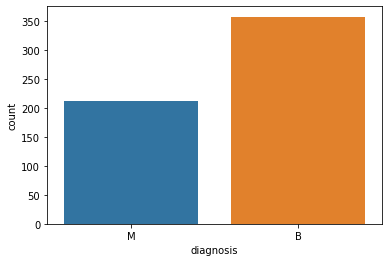

In [ ]:
sns.countplot(df['diagnosis'])
plt.show()

In [ ]:
import plotly.express as px

features = ['perimeter_mean','perimeter_se','perimeter_worst']
fig = px.scatter_matrix(df, dimensions=features, color="diagnosis")
fig.show()

**Applying T-SNE Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.manifold import TSNE
res = TSNE(n_components=2,perplexity=30,n_iter=4000).fit_transform(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



**2D plot for t-SNE**

In [ ]:
tsne_df = pd.DataFrame({'X' : res[:,0],'Y' : res[:,1], 'classification' : y_train})

In [ ]:
y_train_trf = y_train.astype('str')
fig = px.scatter(tsne_df,x = 'X',y = 'Y',color = y_train_trf)
fig.update_layout(margin = dict(l = 20,r=20,t=20,b=20))
fig.show()

**3D for t-SNE**

In [ ]:
res = TSNE(n_components=3,perplexity=30,n_iter=4000).fit_transform(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
tsne_df = pd.DataFrame({'X' : res[:,0],'Y' : res[:,1], 'Z': res[:,2], 'classification' : y_train})

In [ ]:
tsne_df.head()

,X,Y,Z,classification
338,58.247894,119.738602,42.179333,B
427,83.278740,81.140083,118.664436,B
406,-191.103500,28.980747,-52.693256,B
96,-106.927132,-19.576754,199.218979,B
490,30.231339,122.123344,127.256783,B


In [ ]:
tsne_df['classification'].value_counts()

B    290
M    165
Name: classification, dtype: int64

**3D Plot after applying T-SNE**

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype('str')
fig = px.scatter_3d(tsne_df,x = 'X',y = 'Y',z = 'Z',color = y_train_trf)
fig.update_layout(margin = dict(l = 20,r=20,t=20,b=20))
fig.show()

**Implementing UMAP**

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from umap import UMAP


umap_2d = UMAP(n_components=2, init='random', random_state=0).fit_transform(X_train)
umap_3d = UMAP(n_components=3, init='random', random_state=0).fit_transform(X_train)

umap_df = pd.DataFrame({'X' : umap_2d[:,0],'Y' : umap_2d[:,1], 'classification' : y_train})

y_train_trf = y_train.astype('str')
fig = px.scatter(umap_df,x = 'X',y = 'Y',color = y_train_trf)
fig.update_layout(margin = dict(l = 20,r=20,t=20,b=20))
fig.show()

umap_df1 = pd.DataFrame({'X' : umap_3d[:,0],'Y' : umap_3d[:,1], 'Z': umap_3d[:,2], 'classification' : y_train})

y_train_trf = y_train.astype('str')
fig = px.scatter_3d(umap_df1,x = 'X',y = 'Y',z = 'Z',color = y_train_trf)
fig.update_layout(margin = dict(l = 20,r=20,t=20,b=20))
fig.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
acc = accuracy_score(y_test,y_pred)
acc

0.9649122807017544

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  2],
       [ 2, 45]])

In [ ]:
print("classification Report:",classification_report(y_test,y_pred))

classification Report:               precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.svm import SVC
sm = SVC()

In [ ]:
sm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = sm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158


**Conclusion:**

After Applying all the techniques which includes PCA, t-SNE and UMAP, we observerd that, PCA performs well when we select n_components is 15 (According to Hyper-paramter Tuning) for Support Vector Machine (SVM)

When we are comparing with the dimentionality reduction techniques then UMAP performs well compare to PCA and t-SNE, after that PCA performs well as we have shown in visualization.

**Prons for UMAP:**
When we are using umap for 2 dimentional then it shows the good classification of data

**Cons for UMAP:**
When we are using umap for 3 diemtional then we observed some of the data points are miss classified.
Also, it does'nt work well with low dimentional data